In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [58]:
USA_access = "Resources/WB-DATA-3.csv"
top10GDP_access = "Resources/WB-DATA-TOP-10-Access.csv"
bottom8GDP_access = "Resources/WB-DATA-Bottom-10.csv"
all_access = "Resources/WB-DATA-All-Country-Access.csv"
IND = "Resources/WB-DATA-6.csv"



USA_access_df = pd.read_csv(USA_access)
top10GDP_access_df = pd.read_csv(top10GDP_access)
bottom8GDP_access_df = pd.read_csv(bottom8GDP_access)
all_access_df = pd.read_csv(all_access)
IND_df = pd.read_csv(IND)

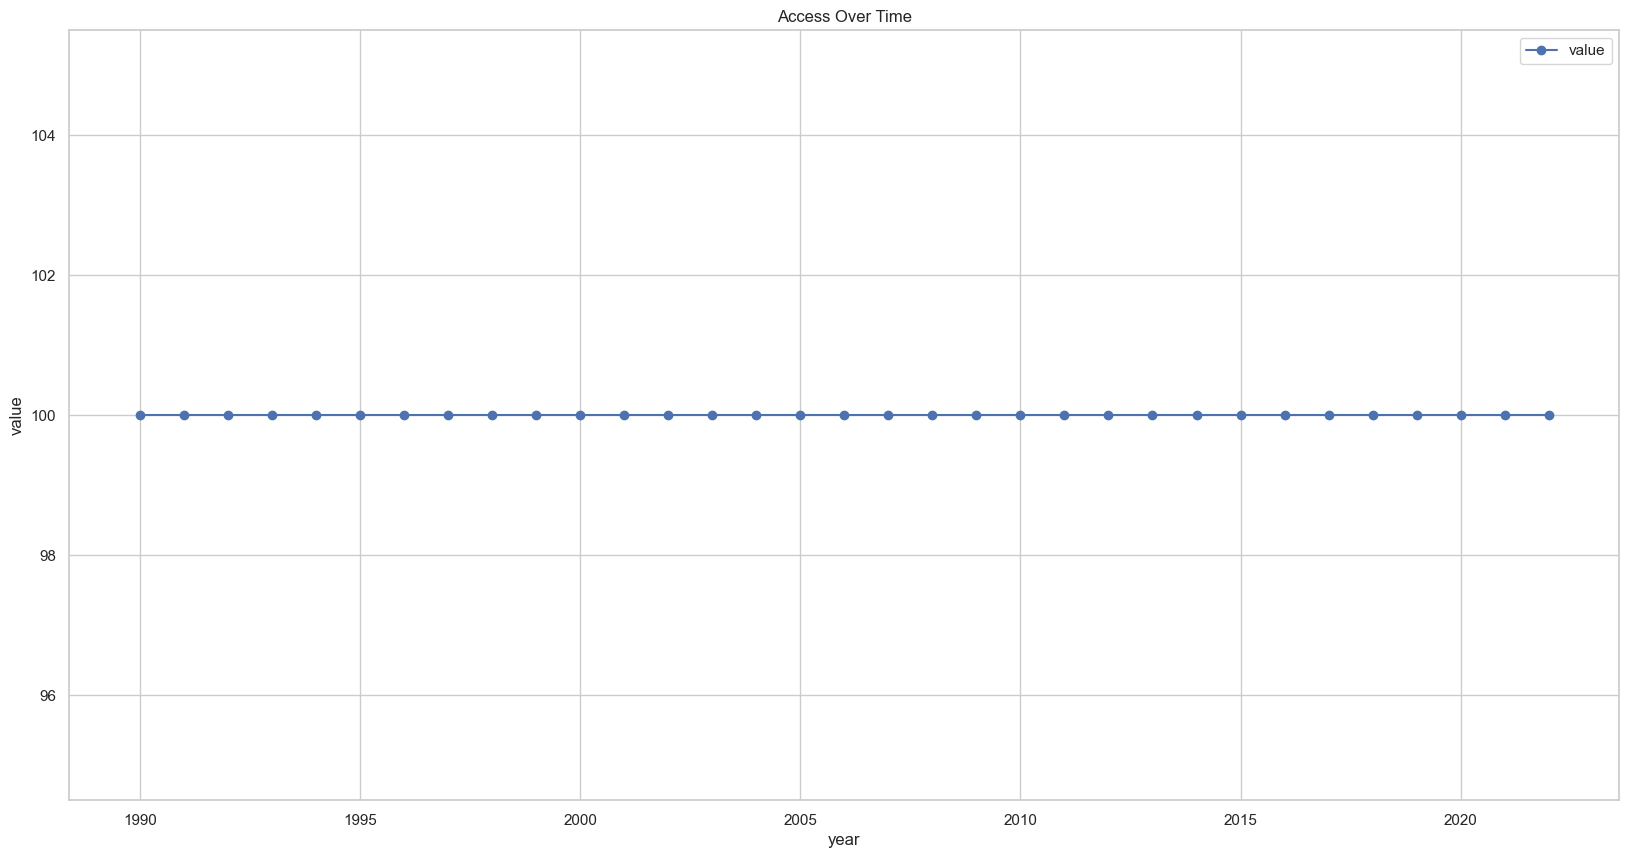

In [59]:
#USA Access Over Time 



# Select relevant columns for plotting
x_column = "year"  
y_column = "value"  

# Convert the x_column to numeric (if needed)
USA_access_df[x_column] = pd.to_numeric(USA_access_df[x_column], errors="coerce")

# Drop NaN values (if any)
USA_access_df = USA_access_df.dropna(subset=[x_column, y_column])

# Sort by x_column (if it's a time-series)
USA_access_df = USA_access_df.sort_values(by=x_column)

# Plot the line graph
plt.figure(figsize=(20, 10))
plt.plot(USA_access_df[x_column], USA_access_df[y_column], marker="o", linestyle="-", color="b", label=y_column)

# Customize the plot
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f"Access Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


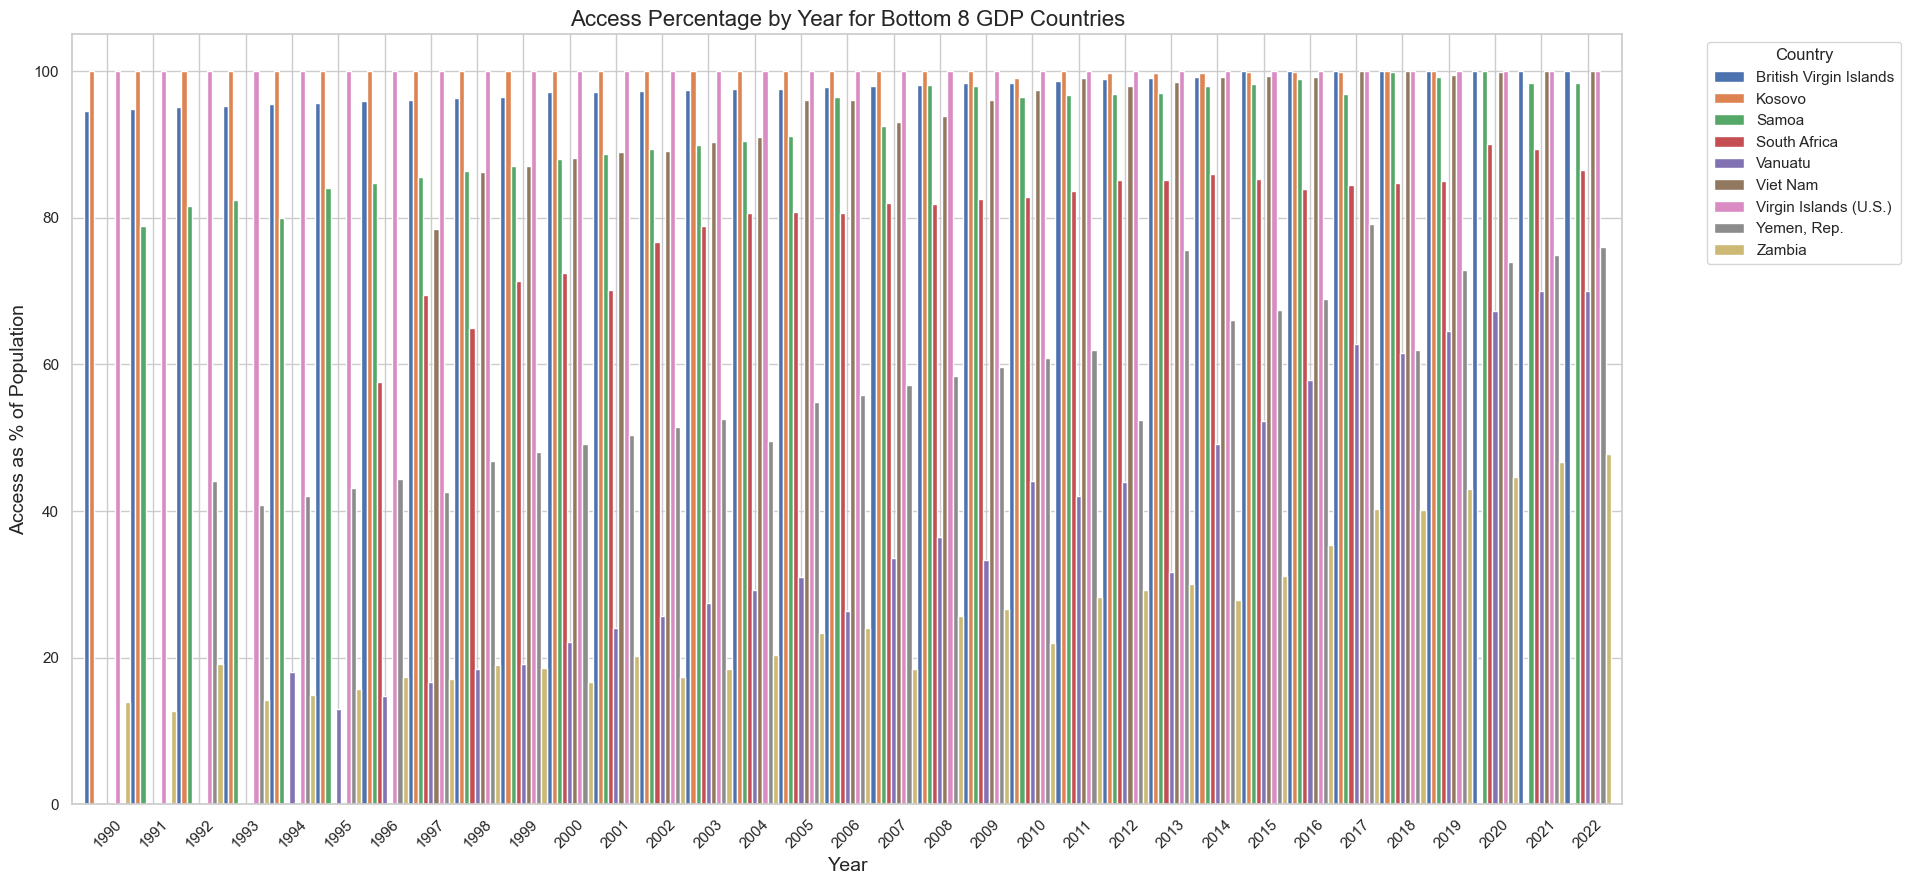

In [60]:
#Bottom 8 Countries by GDP, Access to elec bar graph

sns.set_theme(style="whitegrid")

# Pivot the data to have years on the x-axis and countries as different bars
pivot_df = bottom8GDP_access_df.pivot(index="year", columns="country_name", values="value")

# Plot the grouped bar chart
pivot_df.plot(kind="bar", figsize=(20, 10), width=1)

# Set labels and title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Access as % of Population", fontsize=14)
plt.title("Access Percentage by Year for Bottom 8 GDP Countries", fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")

# Save the plot as a JPEG file
plt.savefig("Bottom_8_GDP_BAR_plot.jpg", format="jpeg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

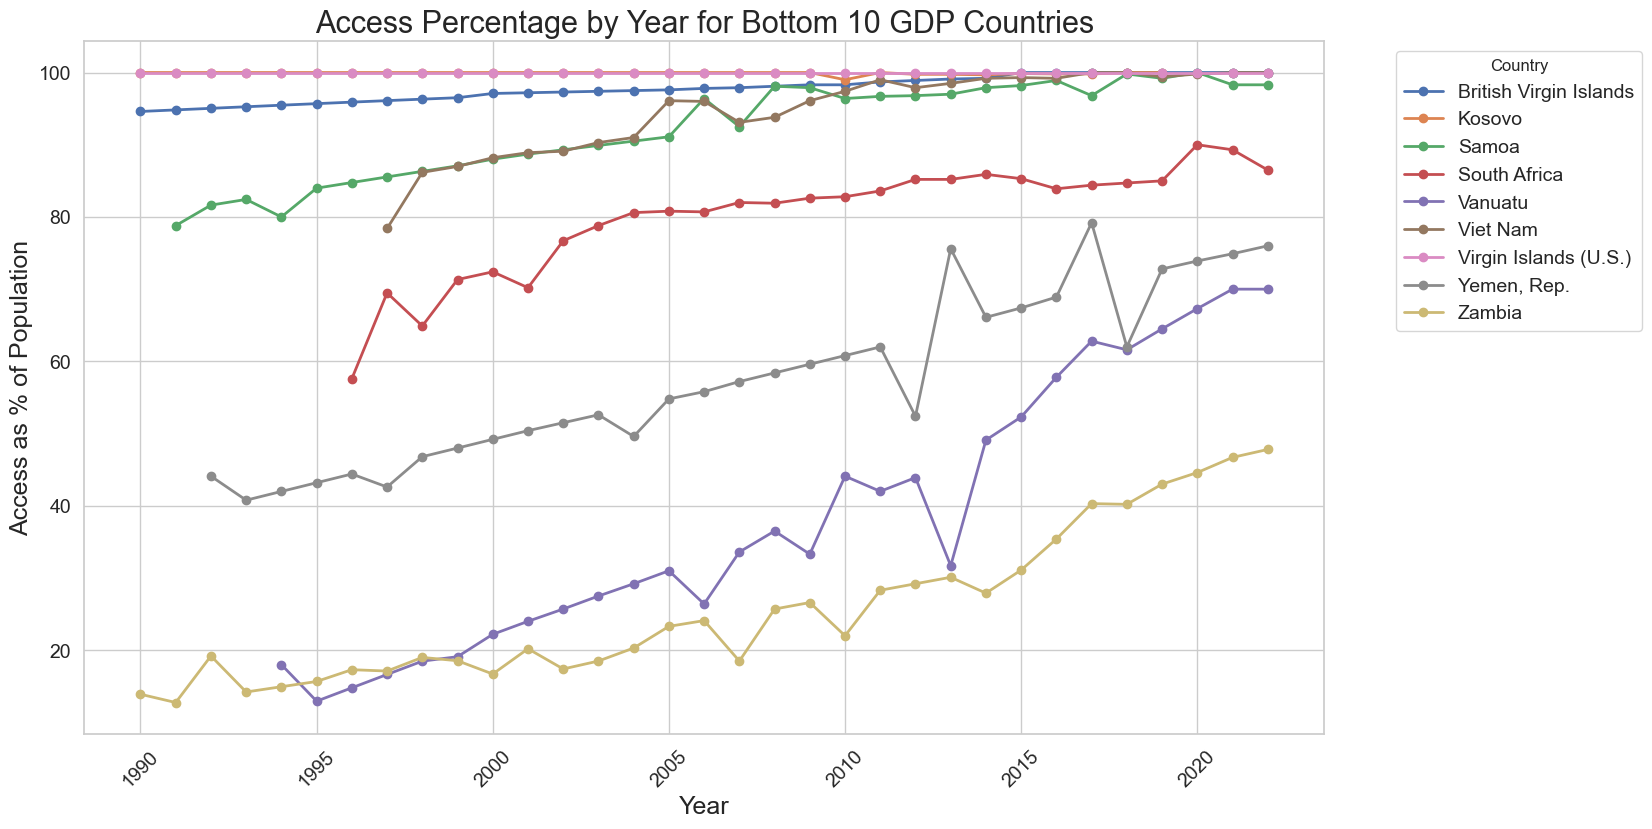

In [61]:
#Bottom 10 Countries by GDP, Access to elec line graph



# Set plot style
sns.set_theme(style="whitegrid")

# Pivot the data to have years on the x-axis and countries as different lines
pivot_df = bottom8GDP_access_df.pivot(index="year", columns="country_name", values="value")

# Plot the line graph with increased spacing and larger size
fig, ax = plt.subplots(figsize=(16, 9))  # Increase figure size
pivot_df.plot(kind="line", ax=ax, marker='o', linewidth=2)  # Change to line plot with markers

# Set labels and title
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Access as % of Population", fontsize=18)
ax.set_title("Access Percentage by Year for Bottom 10 GDP Countries", fontsize=22)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=14)

# Save the plot as a JPEG file
plt.savefig("Bottom_10_GDP_Line_plot.jpg", format="jpeg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

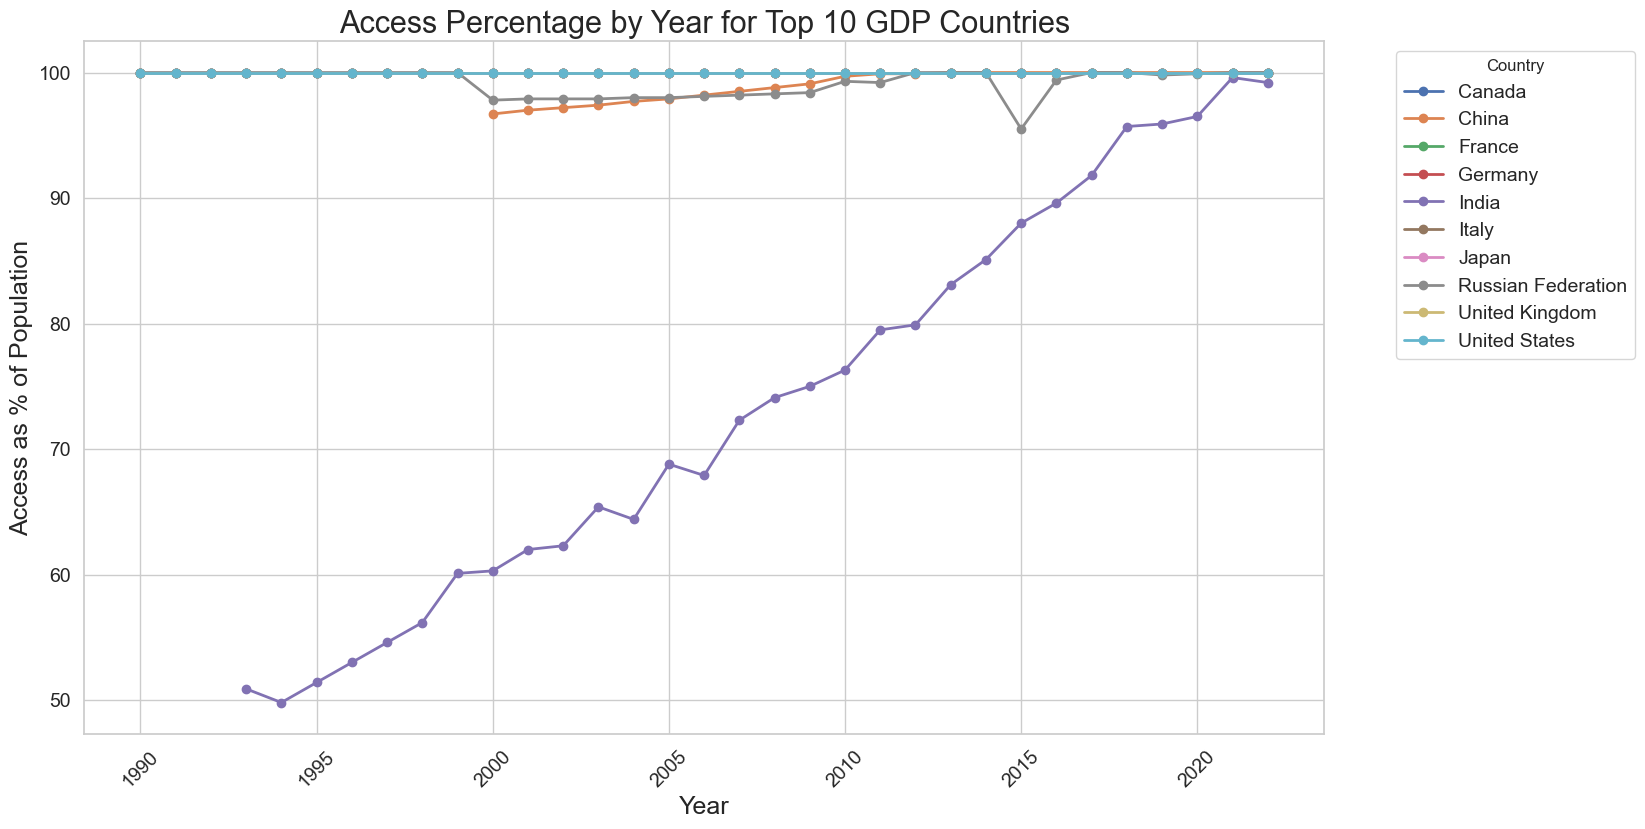

In [62]:
#Top 10 Countries by GDP, Access to elec line graph



# Set plot style
sns.set_theme(style="whitegrid")

# Pivot the data to have years on the x-axis and countries as different lines
pivot_df = top10GDP_access_df.pivot(index="year", columns="country_name", values="value")

# Plot the line graph with increased spacing and larger size
fig, ax = plt.subplots(figsize=(16, 9))  # Increase figure size
pivot_df.plot(kind="line", ax=ax, marker='o', linewidth=2)  # Change to line plot with markers

# Set labels and title
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Access as % of Population", fontsize=18)
ax.set_title("Access Percentage by Year for Top 10 GDP Countries", fontsize=22)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=14)

# Save the plot as a JPEG file
plt.savefig("top_10_GDP_plot.jpg", format="jpeg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [70]:
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="o", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=10)
    plt.tight_layout()

The r-value is: 0.995824986912076


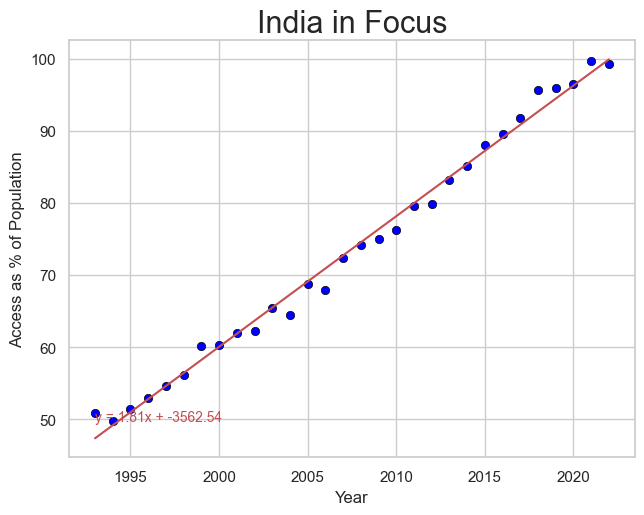

In [73]:
linregress_plot(IND_df["year"], IND_df["value"])

plt.xlabel("Year")
plt.ylabel("Access as % of Population")
plt.title("India in Focus", fontsize=22)



plt.savefig("IND_plot.jpg", format="jpeg", dpi=300, bbox_inches="tight")
plt.show()